## Investigate Source Datasets

In [1]:
# import main libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# compare to direct link to John Hopkins timeset data
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df = pd.read_csv(data, sep=",")

# preview our data
df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2


## Investigate selected Dataset

#### Using JH data - because it's become the standard

In [21]:
# making copy and renaming master file
covid = df.copy()
covid.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2


In [22]:
# sanity check
covid.shape

(259, 78)

In [23]:
# investigating info
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  81 non-null     object 
 1   Country/Region  259 non-null    object 
 2   Lat             259 non-null    float64
 3   Long            259 non-null    float64
 4   1/22/20         259 non-null    int64  
 5   1/23/20         259 non-null    int64  
 6   1/24/20         259 non-null    int64  
 7   1/25/20         259 non-null    int64  
 8   1/26/20         259 non-null    int64  
 9   1/27/20         259 non-null    int64  
 10  1/28/20         259 non-null    int64  
 11  1/29/20         259 non-null    int64  
 12  1/30/20         259 non-null    int64  
 13  1/31/20         259 non-null    int64  
 14  2/1/20          259 non-null    int64  
 15  2/2/20          259 non-null    int64  
 16  2/3/20          259 non-null    int64  
 17  2/4/20          259 non-null    int

In [24]:
covid.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,259.000000,259.000000,259.00000,259.000000,259.000000,259.000000,259.00000,259.000000,259.000000,259.000000
mean,21.367016,22.529732,0.065637,0.069498,0.100386,0.162162,0.216216,0.316602,0.505792,0.513514,...,92.548263,105.011583,118.34749,130.984556,145.104247,162.575290,180.72973,204.567568,226.976834,249.444015
std,24.868461,71.121830,1.056329,1.057914,1.493383,2.486545,3.232521,4.723370,7.767139,7.767629,...,636.225273,710.920249,788.59436,859.968014,939.924845,1024.990163,1113.82787,1225.803944,1336.020523,1445.570299
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,7.270000,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,23.634500,20.902977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000,2.00000,2.000000,2.000000,3.000000
75%,41.178850,82.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.500000,6.00000,7.500000,8.000000,9.500000,11.00000,13.000000,13.500000,17.000000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,8215.000000,9134.000000,10023.00000,10779.000000,11591.000000,12428.000000,13155.00000,13915.000000,14681.000000,15362.000000


## Clean up data

In [25]:
# check to see whether anything is empty
covid.isna().sum()

Province/State    178
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
3/31/20             0
4/1/20              0
4/2/20              0
4/3/20              0
4/4/20              0
Length: 78, dtype: int64

In [26]:
# find those cells to investigate before deleting
covid.drop(['Province/State'], axis=1, inplace=True)

In [27]:
covid

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Burundi,-3.373100,29.918900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,Netherlands,12.178400,-68.238500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,Malawi,-13.254308,34.301525,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Check again
covid.isna().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
3/31/20           0
4/1/20            0
4/2/20            0
4/3/20            0
4/4/20            0
Length: 77, dtype: int64

## Analysis

In [30]:
covid['4/4/20'].sum()

64606

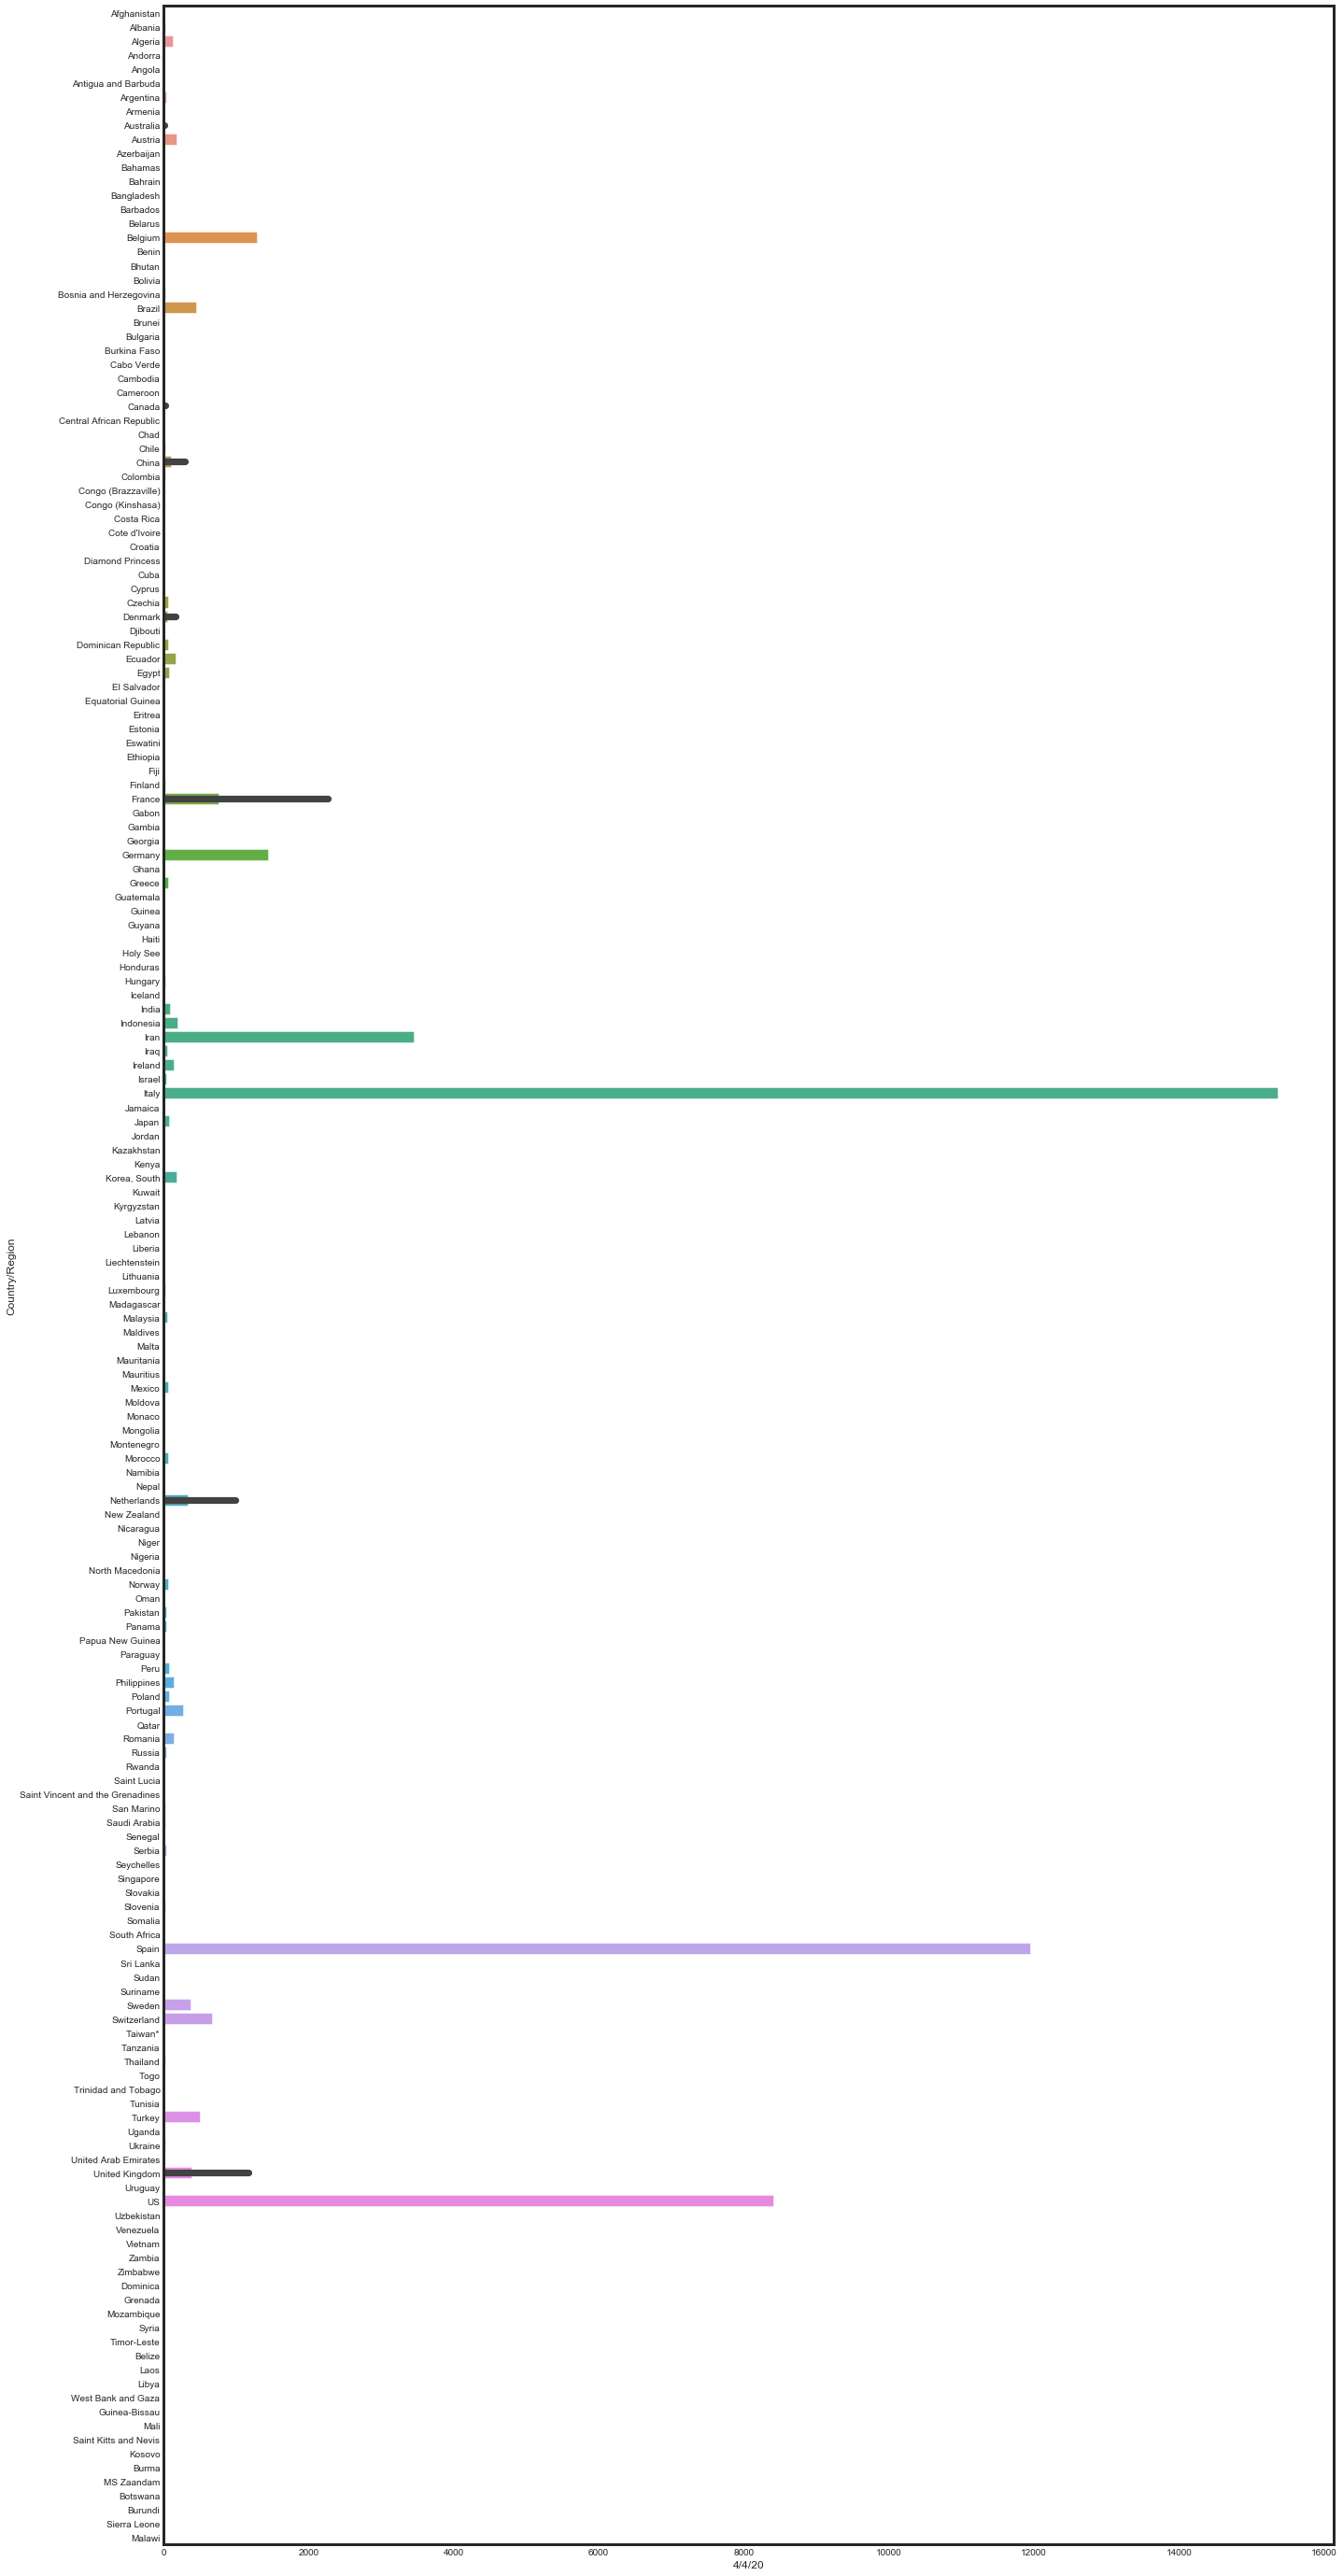

In [31]:
# Barplot of countries
plt.figure(figsize = (20,50))
sns.barplot(x="4/4/20", y="Country/Region", data=covid)

Well, that didn't work. There's too many countries and all have logarthmic death rates.  I think I'll take a look at the maximum number of deaths by country first.


In [32]:
# sort deaths (descending)
covid.sort_values(by=['4/4/20'], inplace=True, ascending=False)
covid

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
137,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362
201,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,4365,5138,5982,6803,7716,8464,9387,10348,11198,11947
225,US,37.0902,-95.7129,0,0,0,0,0,0,0,...,1209,1581,2026,2467,2978,3873,4757,5926,7087,8407
116,France,46.2276,2.2137,0,0,0,0,0,0,0,...,1696,1995,2314,2606,3024,3523,4032,5387,6507,7560
223,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,0,...,578,759,1019,1228,1408,1789,2352,2921,3605,4313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Fiji,-17.7134,178.0650,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,Cambodia,11.5500,104.9167,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Canada,37.6489,-122.6655,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,Canada,46.5653,-66.4619,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# deaths by top 20 countries 
covid.head(20)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
137,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362
201,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,4365,5138,5982,6803,7716,8464,9387,10348,11198,11947
225,US,37.0902,-95.7129,0,0,0,0,0,0,0,...,1209,1581,2026,2467,2978,3873,4757,5926,7087,8407
116,France,46.2276,2.2137,0,0,0,0,0,0,0,...,1696,1995,2314,2606,3024,3523,4032,5387,6507,7560
223,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,0,...,578,759,1019,1228,1408,1789,2352,2921,3605,4313
133,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,2234,2378,2517,2640,2757,2898,3036,3160,3294,3452
62,China,30.9756,112.2707,17,17,24,40,52,76,125,...,3169,3174,3177,3182,3186,3187,3193,3199,3203,3207
169,Netherlands,52.1326,5.2913,0,0,0,0,0,0,0,...,434,546,639,771,864,1039,1173,1339,1487,1651
120,Germany,51.0000,9.0000,0,0,0,0,0,0,0,...,267,342,433,533,645,775,920,1107,1275,1444
23,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,220,289,353,431,513,705,828,1011,1143,1283


In [34]:
covid['4/4/20'].sum()

64606

## Visualizations of Data

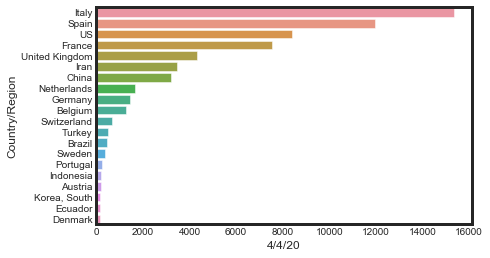

In [35]:
data=covid.head(20)
sns.barplot(x='4/4/20', y='Country/Region', data=data)

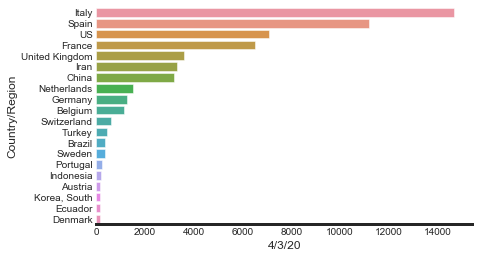

In [36]:
sns.barplot(x='4/3/20', y='Country/Region', data=data)
sns.despine(left=True)
sns.set_style('white')

##### look at US separately - test case
##### 3 - good cases - South Korea, Singapore, China (outliers)
##### ROW - training

##### logarithmic

TO DO FIRST:
1) change data to look at increment per day per country - KEY!!!!!!!!!
2) look at time-series - # of days vs # of deaths, # of days vs. # of cases
3) merge in ICU

### Model Construction

In [37]:
covid.rename(columns = {"4/4/20":"deaths"}, inplace = True)
covid

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,deaths
137,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362
201,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,4365,5138,5982,6803,7716,8464,9387,10348,11198,11947
225,US,37.0902,-95.7129,0,0,0,0,0,0,0,...,1209,1581,2026,2467,2978,3873,4757,5926,7087,8407
116,France,46.2276,2.2137,0,0,0,0,0,0,0,...,1696,1995,2314,2606,3024,3523,4032,5387,6507,7560
223,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,0,...,578,759,1019,1228,1408,1789,2352,2921,3605,4313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Fiji,-17.7134,178.0650,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,Cambodia,11.5500,104.9167,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Canada,37.6489,-122.6655,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,Canada,46.5653,-66.4619,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
covid['Country/Region'].isna().sum()

0

In [46]:
covid['Country/Region'] = pd.factorize(covid['Country/Region'], sort=True)[0] + 1
df = covid[['Country/Region', 'deaths']]
df

,Country/Region,deaths
137,85,15362
201,155,11947
225,170,8407
116,62,7560
223,174,4313
...,...,...
105,60,0
33,31,0
37,33,0
39,33,0


In [87]:
# we will need to import additional libraries in order to build our predictor model.
import time
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)

## Classification Model

We will use 10 different models in order to select the optimal one for predicting if a customer will make a purchase or not in the first 90 days after a campaign is set thru different channels, sources, mediums, etc.

In [88]:
# we will test several different models in order to select the optimal
models = { 'Linear Regression':LinearRegression(),
         'Random Forest Regressor': RandomForestRegressor(),          
#    'Gradient Boosting':GradientBoostingClassifier(),
#          'Adaptive Boosting':AdaBoostClassifier(),
#          'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
#           'Logistic Regression':LogisticRegression(solver='lbfgs', multi_class='auto'),
#          'Random Forest Classifier': RandomForestClassifier(n_estimators=18),
#          'K Nearest Neighbour':KNeighborsClassifier(),
#         'Linear SVM': SVC(gamma='scale'),
#          'Decision Tree': tree.DecisionTreeClassifier(),
#          'Neural Net': MLPClassifier(alpha=1),
#         'Naive Bayes': GaussianNB()
         }

In [89]:
# set our target value and drop it from the main df
array = covid.values
y = np.array(pd.DataFrame(covid['deaths']))
y = array[:,1]
X = covid.drop(['deaths'],axis=1)

# build our train/test files
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# import library to help us preprocess the data
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [90]:
# sanity check
y.shape

(259,)

In [91]:
# sanity check
X.shape

(259, 76)

In [92]:
number_cls = len(models.keys())

def classify_models(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(number_cls,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in models.items():
        time_start = time.process_time()
        classifier.fit(X_train, Y_train)
        time_end = time.process_time()
        time_diff = time_end - time_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = time_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=time_diff))
        count+=1
    return df_results


In [93]:
df_results = classify_models(X_train, y_train)

print(df_results.sort_values(by='train_score', ascending=False))

trained Linear Regression in 0.05 s
trained Random Forest Regressor in 1.53 s
                classifier  train_score  training_time
0        Linear Regression     1.000000       0.045451
1  Random Forest Regressor     0.999666       1.527571


### There seems to be overfitting in our training results, we will need to use cross validation to avoid it.

In [109]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
    regressor = sklearn_regressor(**model_parameters)
    
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    regressor.fit(X_train, y_train)
    
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    training_score = regressor.score(X_train, y_train)
    testing_score = regressor.score(X_test, y_test)
    
    # Print the results!
    print(f"Train score: {training_score:>5.4f}")
    print(f"Test score: {testing_score:>7.4f}")
    if print_oob_score:
        print(f"OOB score: {regressor.oob_score_:>8.4f}")
        
    return regressor

In [115]:
# define parameters
parameters = {'max_depth':[7,10,15,20], 
              'n_estimators': [20,30,40,50,60,75],
              'min_samples_leaf':[2,5,10,15]
#             'leaning_rate'
             }
# initialize model
rf_regressor= RandomForestRegressor(n_jobs=-1, random_state=42)
# initialize grid search and fit
regressor = GridSearchCV(rf_regressor, parameters)
regressor.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [116]:
# print out what GridSearchCV found to be the best parameters 
regressor.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [117]:
# Take the best parameters from grid search and fit a model
parameters = regressor.best_estimator_.get_params()
trained_regressor = train_score_regressor(sklearn_regressor=RandomForestRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters,
                                          print_oob_score=False)

Train score: 0.9989
Test score:  0.9991


In [ ]:
# look at best_estimators to refine search to not overfit
# other countries vs US (split out)

In [108]:
clf_results = covid.sort_values(by=['Crossval Mean Scores'], ascending=False)
clf_results

KeyError: 'Crossval Mean Scores'

It seems that we are still getting an overfitted result, we will need to load the original dataset and remove more dta, eiter columns or dropping NaNs since we are using the value 0 for NaN a lot.

In [ ]:
# load and read our dataset for initial exploration
df = pd.read_csv('new_df.csv', sep = ',')

# preview our data
df.head(5)

In [ ]:
# sanity check
df.shape

In [ ]:
df.isna().sum()

In [ ]:
# drop some columns
clean_df = df.drop(['created_at','birthyear','gender','orig_2','purchase_90_n'],axis=1)
clean_df.head(5)

In [ ]:
# sanity check
clean_df.shape

In [ ]:
# fill nans on channel column
clean_df['channel'].fillna(100, inplace=True)

In [ ]:
# make copy just in case
clean_df_copy = clean_df.copy()

In [ ]:
# drop NaNs
clean_df = clean_df.dropna(axis = 0, how ='any') 

In [ ]:
# sanity check
clean_df.shape

In [ ]:
clean_df.to_csv('clean_df.csv', header=True, index=False, encoding='utf-8')

In [ ]:
# let's review if we still have any NaNs
clean_df.isna().sum()

In [ ]:
# set our target value and drop it from the main df
y_ = np.array(pd.DataFrame(clean_df['purchase_90_bin']))
y_ = y_[:,0]
X_ = clean_df.drop(['purchase_90_bin'],axis=1)

# build our train/test files
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.25, random_state=42)

# import library to help us preprocess the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_.shape

In [ ]:
# sanity check
X_.shape

In [ ]:
# we will use the function we made in the first clf iteration
df_results_new = classify_models(X_train, y_train)

print(df_results_new.sort_values(by='train_score', ascending=False))

### Still looks a little bit overfitted, lets try with Cross Validation on this set too.

In [ ]:
# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

###########################################

# Create a Dataframe with the results.
clf_df_2 = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test]}

clf_results = pd.DataFrame(data=clf_df_2)



In [ ]:
clf_results_2 = clf_results.sort_values(by=['Crossval Mean Scores'], ascending=False)
clf_results_2

In [ ]:
clean_df['purchase_90_bin'].unique()

In [ ]:
# explore how many purchase there really exist
plt.hist((clean_df.purchase_90_bin))
plt.show()

### We are just looking at accuracy and we are not looking at the whole picture, let's integrate precision, recall, AUC and F1 to our function so we can visualize it.

In [ ]:
# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
y_hat = LR.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_hat)
precision = metrics.precision_score(y_test,y_hat,average='macro')
recall = metrics.recall_score(y_test,y_hat,average='macro')
roc_auc = roc_auc_score(y_hat,y_test)
f1_score = metrics.f1_score(y_test,y_hat,average='macro')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

print('Logistic regression Precision: {:.2f}'
     .format(precision))

print('Logistic regression Recall: {:.2f}'
     .format(recall))
      
print('Logistic regression AUC: {:.2f}'
      .format(roc_auc))

print('Accuracy of Logistic regression F1 Score: {:.2f}'
     .format(f1_score))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
y_hat = cross_val_predict(LR, X_train, y_train, cv=3)
lr_accuracy = accuracy_score(y_train,y_hat)
lr_precision = precision_score(y_train,y_hat,average='macro')
lr_recall = recall_score(y_train,y_hat,average='macro')
lr_roc_auc = roc_auc_score(y_hat,y_train)
lr_f1_score = f1_score(y_train,y_hat,average='macro')


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

print('Logistic regression Precision: {:.2f}'
     .format(lr_precision))

print('Logistic regression Recall: {:.2f}'
     .format(lr_recall))
      
print('Logistic regression AUC: {:.2f}'
      .format(lr_roc_auc))

print('Accuracy of Logistic regression F1 Score: {:.2f}'
     .format(lr_f1_score))

###########################################
print('-----------------------------------\n')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
y_hat = cross_val_predict(svc, X_train, y_train, cv=3)
svc_accuracy = accuracy_score(y_train,y_hat)
svc_precision = precision_score(y_train,y_hat,average='macro')
svc_recall = recall_score(y_train,y_hat,average='macro')
svc_roc_auc = roc_auc_score(y_hat,y_train)
svc_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

print('SVC Precision: {:.2f}'
     .format(svc_precision))

print('SVC Recall: {:.2f}'
     .format(svc_recall))
      
print('SVC AUC: {:.2f}'
      .format(svc_roc_auc))

print('SVC F1 Score: {:.2f}'
     .format(svc_f1_score))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)
y_hat = cross_val_predict(knn, X_train, y_train, cv=3)
knn_accuracy = accuracy_score(y_train,y_hat)
knn_precision = precision_score(y_train,y_hat,average='macro')
knn_recall = recall_score(y_train,y_hat,average='macro')
knn_roc_auc = roc_auc_score(y_hat,y_train)
knn_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

print('K-NN Precision: {:.2f}'
     .format(knn_precision))

print('K-NN Recall: {:.2f}'
     .format(knn_recall))
      
print('K-NN AUC: {:.2f}'
      .format(knn_roc_auc))

print('K-NN F1 Score: {:.2f}'
     .format(knn_f1_score))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)
y_hat = cross_val_predict(dt, X_train, y_train, cv=3)
dt_accuracy = accuracy_score(y_train,y_hat)
dt_precision = precision_score(y_train,y_hat,average='macro')
dt_recall = recall_score(y_train,y_hat,average='macro')
dt_roc_auc = roc_auc_score(y_hat,y_train)
dt_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

print('Decision Tree Precision: {:.2f}'
     .format(dt_precision))

print('Decision Tree Recall: {:.2f}'
     .format(dt_recall))
      
print('Decision Tree AUC: {:.2f}'
      .format(dt_roc_auc))

print('Decision Tree F1 Score: {:.2f}'
     .format(dt_f1_score))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)
y_hat = cross_val_predict(gb, X_train, y_train, cv=3)
gb_accuracy = accuracy_score(y_train,y_hat)
gb_precision = precision_score(y_train,y_hat,average='macro')
gb_recall = recall_score(y_train,y_hat,average='macro')
gb_roc_auc = roc_auc_score(y_hat,y_train)
gb_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

print('Gradient Boosting Precision: {:.2f}'
     .format(gb_precision))

print('Gradient Boosting Recall: {:.2f}'
     .format(gb_recall))
      
print('Gradient Boosting AUC: {:.2f}'
      .format(gb_roc_auc))

print('Gradient Boosting F1 Score: {:.2f}'
     .format(gb_f1_score))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)
y_hat = cross_val_predict(rf, X_train, y_train, cv=3)
rf_accuracy = accuracy_score(y_train,y_hat)
rf_precision = precision_score(y_train,y_hat,average='macro')
rf_recall = recall_score(y_train,y_hat,average='macro')
rf_roc_auc = roc_auc_score(y_hat,y_train)
rf_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

print('Random Forest Precision: {:.2f}'
     .format(rf_precision))

print('Random Forest Recall: {:.2f}'
     .format(rf_recall))
      
print('Random Forest AUC: {:.2f}'
      .format(rf_roc_auc))

print('Random Forest F1 Score: {:.2f}'
     .format(rf_f1_score))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)
y_hat = cross_val_predict(nn, X_train, y_train, cv=3)
nn_accuracy = accuracy_score(y_train,y_hat)
nn_precision = precision_score(y_train,y_hat,average='macro')
nn_recall = recall_score(y_train,y_hat,average='macro')
nn_roc_auc = roc_auc_score(y_hat,y_train)
nn_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

print('NeuralNet Precision: {:.2f}'
     .format(nn_precision))

print('NeuralNet Recall: {:.2f}'
     .format(nn_recall))
      
print('NeuralNet AUC: {:.2f}'
      .format(nn_roc_auc))

print('NeuralNet F1 Score: {:.2f}'
     .format(nn_f1_score))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)
y_hat = cross_val_predict(gnb, X_train, y_train, cv=3)
gnb_accuracy = accuracy_score(y_train,y_hat)
gnb_precision = precision_score(y_train,y_hat,average='macro')
gnb_recall = recall_score(y_train,y_hat,average='macro')
gnb_roc_auc = roc_auc_score(y_hat,y_train)
gnb_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

print('GNB Precision: {:.2f}'
     .format(gnb_precision))

print('GNB Recall: {:.2f}'
     .format(gnb_recall))
      
print('GNB AUC: {:.2f}'
      .format(gnb_roc_auc))

print('GNB F1 Score: {:.2f}'
     .format(gnb_f1_score))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)
y_hat = cross_val_predict(ab, X_train, y_train, cv=3)
ab_accuracy = accuracy_score(y_train,y_hat)
ab_precision = precision_score(y_train,y_hat,average='macro')
ab_recall = recall_score(y_train,y_hat,average='macro')
ab_roc_auc = roc_auc_score(y_hat,y_train)
ab_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

print('AdaBoost Precision: {:.2f}'
     .format(ab_precision))

print('AdaBoost Recall: {:.2f}'
     .format(ab_recall))
      
print('AdaBoost AUC: {:.2f}'
      .format(ab_roc_auc))

print('AdaBoost F1 Score: {:.2f}'
     .format(ab_f1_score))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)
y_hat = cross_val_predict(lda, X_train, y_train, cv=3)
lda_accuracy = accuracy_score(y_train,y_hat)
lda_precision = precision_score(y_train,y_hat,average='macro')
lda_recall = recall_score(y_train,y_hat,average='macro')
lda_roc_auc = roc_auc_score(y_hat,y_train)
lda_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

print('LDA Precision: {:.2f}'
     .format(lda_precision))

print('LDA Recall: {:.2f}'
     .format(lda_recall))
      
print('LDA AUC: {:.2f}'
      .format(lda_roc_auc))

print('LDA F1 Score: {:.2f}'
     .format(lda_f1_score))

###########################################

# Create a Dataframe with the results.
clf_df_3 = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test],
           'Precision':[lr_precision,svc_precision,knn_precision,dt_precision,gb_precision,rf_precision,nn_precision,gnb_precision,ab_precision,lda_precision],
           'Recall':[lr_recall,svc_recall,knn_recall,dt_recall,gb_recall,rf_recall,nn_recall,gnb_recall,ab_recall,lda_recall],
            'AUC':[lr_roc_auc,svc_roc_auc,knn_roc_auc,dt_roc_auc,gb_roc_auc,rf_roc_auc,nn_roc_auc,gnb_roc_auc,ab_roc_auc,lda_roc_auc],
           'F1 Score':[lr_f1_score,svc_f1_score,knn_f1_score,dt_f1_score,gb_f1_score,rf_f1_score,nn_f1_score,gnb_f1_score,ab_f1_score,lda_f1_score]}

clf_results = pd.DataFrame(data=clf_df_3)

In [ ]:
# we will sort them by F1 Score
clf_results_3 = clf_results.sort_values(by=['F1 Score'], ascending=False)
clf_results_3

<img src="confusion_matrix.png">

### We will proceed with Gradiant Boosting and Random Forest for the sake of make a confussion matrix comparison

In [ ]:
# let's run Gradient Boosting again 
y_pred = cross_val_predict(gb, X_train, y_train, cv=7)

In [ ]:
print('Precision Score: ', precision_score(y_train, y_pred))
print('Recall Score: ', recall_score(y_train, y_pred))
print('F1 Score:', f1_score(y_train, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_train, y_pred)
f, ax = plt.subplots(figsize=(12, 8))

# plot the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(con_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Did not Made Purchase', 'Made Purchase'], fontsize=16, rotation=360)
plt.show()

In [ ]:
# let's run Random Forest again 
y_pred_lr = cross_val_predict(rf, X_train, y_train, cv=7)

In [ ]:
print('Precision Score: ', precision_score(y_train, y_pred_lr))
print('Recall Score: ', recall_score(y_train, y_pred_lr))
print('F1 Score:', f1_score(y_train, y_pred_lr))

In [ ]:
con_matrix = confusion_matrix(y_train, y_pred_lr)
f, ax = plt.subplots(figsize=(12, 8))

# plot the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(con_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Did not Made Purchase', 'Made Purchase'], fontsize=16, rotation=360)
plt.show()

In [ ]:
y_scores = cross_val_predict(rf, X_train, y_train, cv=7, method="predict_proba")

In [ ]:
# sanity check
y_scores.shape

In [ ]:
y_scores = y_scores[:, 1]

In [ ]:
# sanity check
y_scores.shape

In [ ]:
# How can we decide which threshold to use? 
# We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

In [ ]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([0, 1])
    plt.ylim([0, 1.25])
    plt.axvline(x=0.43, linewidth=3, color="#0B3861")
    
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()